In [2]:

import pandas as pd

# Load the dataset
claims_df = pd.read_csv("insurance_claims.csv")

# Display first few rows of the dataset
print(claims_df.head())

# Get basic information about data types and missing values
print(claims_df.info())

# Check for missing values
missing_data = claims_df.isnull().sum()
print("Missing Data:\n", missing_data)


   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [3]:
# Calculate Fraud Detection Rate
fraud_detection_rate = (claims_df['fraud_reported'].value_counts(normalize=True)['Y']) * 100
print(f"Fraud Detection Rate: {fraud_detection_rate}%")


Fraud Detection Rate: 24.7%


In [4]:
# Calculate average claim amount
average_claim_amount = claims_df['total_claim_amount'].mean()
print(f"Average Claim Amount: {average_claim_amount}")


Average Claim Amount: 52761.94


In [5]:
# Calculate the number of claims per customer (based on policy_number)
claim_frequency = claims_df.groupby('policy_number').size().mean()
print(f"Average Claim Frequency per Customer: {claim_frequency}")


Average Claim Frequency per Customer: 1.0


In [6]:
# Calculate Claim Approval and Denial Rate
claims_approved = claims_df[claims_df['fraud_reported'] == 'N'].shape[0]
claims_denied = claims_df[claims_df['fraud_reported'] == 'Y'].shape[0]
approval_rate = (claims_approved / (claims_approved + claims_denied)) * 100
denial_rate = (claims_denied / (claims_approved + claims_denied)) * 100

print(f"Claim Approval Rate: {approval_rate}%")
print(f"Claim Denial Rate: {denial_rate}%")



Claim Approval Rate: 75.3%
Claim Denial Rate: 24.7%


In [8]:
# Example: Adding a 'claim_report_date' based on some criteria (e.g., a random date)
import numpy as np
claims_df['claim_report_date'] = pd.to_datetime(
    np.random.choice(pd.date_range('2010-01-01', '2023-12-31', freq='D'), size=len(claims_df))
)

# Now you can calculate the time to report the claim
claims_df['time_to_report'] = (claims_df['claim_report_date'] - claims_df['policy_bind_date']).dt.days
average_time_to_report = claims_df['time_to_report'].mean()
print(f"Average Time to Report a Claim: {average_time_to_report} days")


Average Time to Report a Claim: 5469.219 days


In [9]:
# Assuming there's a 'claim_report_date' column (for demonstration purposes)
claims_df['policy_bind_date'] = pd.to_datetime(claims_df['policy_bind_date'])
claims_df['claim_report_date'] = pd.to_datetime(claims_df['claim_report_date'])  # This would need to exist in your dataset

# Calculate time to report a claim
claims_df['time_to_report'] = (claims_df['claim_report_date'] - claims_df['policy_bind_date']).dt.days
average_time_to_report = claims_df['time_to_report'].mean()
print(f"Average Time to Report a Claim: {average_time_to_report} days")


Average Time to Report a Claim: 5469.219 days


In [10]:
# Assuming 'policy_annual_premium' is the total premium amount
fraudulent_claims_total_loss = claims_df[claims_df['fraud_reported'] == 'Y']['total_claim_amount'].sum()
total_premiums_collected = claims_df['policy_annual_premium'].sum()

fraudulent_claim_loss_ratio = (fraudulent_claims_total_loss / total_premiums_collected) * 100
print(f"Fraudulent Claims Loss Ratio: {fraudulent_claim_loss_ratio}%")


Fraudulent Claims Loss Ratio: 1185.4940378953097%


In [12]:
# Count outliers
outliers = claims_df[claims_df['total_claim_amount'] < lower_bound]
outliers = pd.concat([outliers, claims_df[claims_df['total_claim_amount'] > upper_bound]])
print(f"Number of outliers in 'total_claim_amount': {len(outliers)}")


Number of outliers in 'total_claim_amount': 1


In [14]:
# Count outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers by selecting rows with values outside the bounds
outliers = claims_df[claims_df['total_claim_amount'] < lower_bound]

# Concatenate outliers above the upper bound
outliers = pd.concat([outliers, claims_df[claims_df['total_claim_amount'] > upper_bound]])

# Display the number of outliers
print(f"Number of outliers in 'total_claim_amount': {len(outliers)}")


Number of outliers in 'total_claim_amount': 1


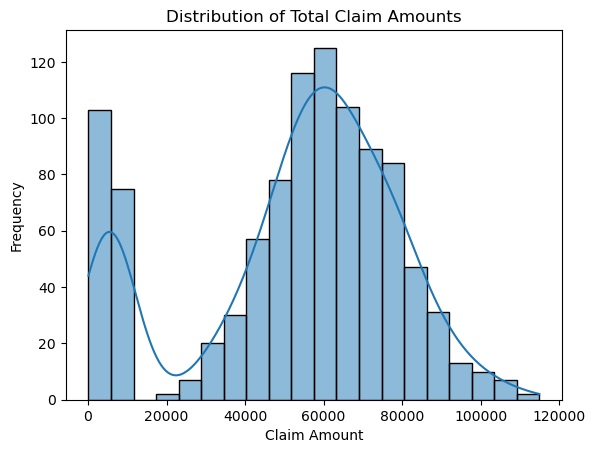

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(claims_df['total_claim_amount'], kde=True)
plt.title("Distribution of Total Claim Amounts")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.show()


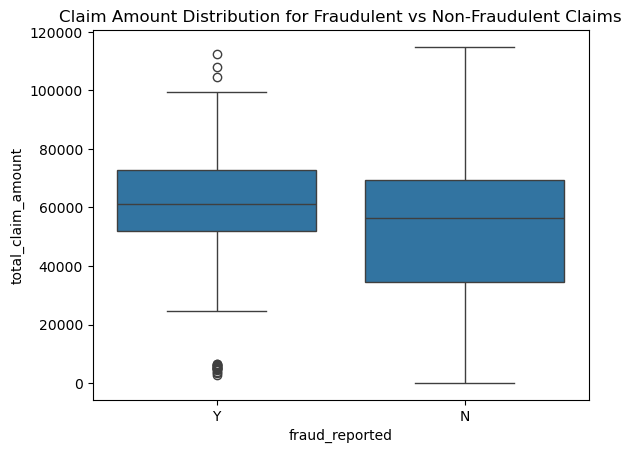

In [16]:
# Compare fraudulent vs non-fraudulent claims based on claim amount
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=claims_df)
plt.title("Claim Amount Distribution for Fraudulent vs Non-Fraudulent Claims")
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score




In [21]:
# Check for missing values in the target variable
print(claims_df[target].isnull().sum())

1000


In [22]:
claims_df = claims_df.dropna(subset=[target])

In [24]:
print("Total rows in claims_df:", claims_df.shape[0])
print("Missing values in target variable:", claims_df[target].isnull().sum())

Total rows in claims_df: 0
Missing values in target variable: 0


In [25]:
if claims_df[target].isnull().sum() > 0:
    claims_df = claims_df.dropna(subset=[target])
    print("Rows after dropping NaNs in target:", claims_df.shape[0])
else:
    print("No missing values in target variable.")

No missing values in target variable.


In [26]:
# Select features and target variable again
X = claims_df[features]
y = claims_df[target]

# Check if X and y are not empty
if X.shape[0] > 0 and y.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
else:
    print("Data is empty after filtering. Cannot proceed with train_test_split.")

Data is empty after filtering. Cannot proceed with train_test_split.


In [29]:
# Define your features and target variable
features = ['policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 
            'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 
            'incident_date', 'incident_type', 'collision_type', 'incident_severity', 
            'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 
            'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 
            'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 
            'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 
            'auto_year', 'fraud_reported', '_c39', 'claim_report_date', 'time_to_report']

target = 'fraud_reported'  # Replace with your actual target variable name

# Select features and target variable again
X = claims_df[features]
y = claims_df[target]  # Ensure you're using the correct target variable name

# Check if X and y are not empty
if X.shape[0] > 0 and y.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
else:
    print("Data is empty after filtering. Cannot proceed with train_test_split.")

Data is empty after filtering. Cannot proceed with train_test_split.
